In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:

# 读取txt文件中的数据
def read_experiment_data(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        # print(content)
    return content

# 提取实验的标题和指标（如 gradient_residue_sum, test_loss 等）
def extract_experiment_data(content):
    # split the content by 'commu:'
    content = content.split('commu:')
    # print(content)
    experiment_data = []
    # 匹配每次实验的数据
    title_pattern = 'trained_models/.*/'
    gradient_residue_sum_pattern = 'gradient_residue_sum, gradient_residue_list = ([\d\.eE\+\-]+),'
    fidelity_pattern = 'distance, test_loss, test_acc, test_auc = ([\d\.eE\+\-]+), ([\d\.eE\+\-]+), ([\d\.eE\+\-]+), ([\d\.eE\+\-]+)'
    efficiency_pattern = 'total_time, communication_cost, final_epoch = ([\d\.eE\+\-]+), ([\d\.eE\+\-]+), (\d+)'
    FIA_pattern = 'rand_mse, mse = ([\d\.eE\+\-]+), ([\d\.eE\+\-]+)'
    
    for content_part in content:
        # if len(content_part) < 20:
        #     continue
        # print(content_part)
        title_pattern_search = re.search(title_pattern, content_part)
        if not (title_pattern_search is None):
            title = title_pattern_search.group(0)[15:-1]
        else:
            continue
        gradient_residue_sum_pattern_search = re.search(gradient_residue_sum_pattern, content_part)
        if not (gradient_residue_sum_pattern_search is None):
            gradient_residue_sum = gradient_residue_sum_pattern_search.group(1)
        else:
            gradient_residue_sum = np.nan
        fidelity_pattern_search = re.search(fidelity_pattern, content_part)
        if not (fidelity_pattern_search is None):
            distance = fidelity_pattern_search.group(1)
            test_loss = fidelity_pattern_search.group(2)
            test_acc = fidelity_pattern_search.group(3)
            test_auc = fidelity_pattern_search.group(4)
        else:
            distance = np.nan
            test_loss = np.nan
            test_acc = np.nan
            test_auc = np.nan
        efficiency_pattern_search = re.search(efficiency_pattern, content_part)
        if not (efficiency_pattern_search is None):
            total_time = efficiency_pattern_search.group(1)
            communication_cost = efficiency_pattern_search.group(2)
            final_epoch = efficiency_pattern_search.group(3)
        else:
            total_time = np.nan
            communication_cost = np.nan
            final_epoch = np.nan
        # FIA_pattern_search = re.search(FIA_pattern, content_part)
        # if not (FIA_pattern_search is None):
        #     rand_mse = FIA_pattern_search.group(1)
        #     mse = FIA_pattern_search.group(2)
        # else:
        #     rand_mse = np.nan
            mse = np.nan
        # 添加到实验数据列表
        experiment_data.append({
            'Comm. Type': title,
            'Gradient Residue Sum': gradient_residue_sum,
            'pred_KL_distance': distance,
            'Test Loss': test_loss,
            'Test Accuracy': test_acc,
            'Test AUC': test_auc,
            'Total Time': total_time,
            'Communication Cost': communication_cost,
            'Final Epoch': final_epoch,
            # 'rand_mse': float(rand_mse) - float(mse),
            # 'mse': mse
        })
    return experiment_data

# 将数据转化为 LaTeX 表格
def generate_latex_table(experiment_data):
    # 表头
    table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}\n\\hline\n"
    table += "Comm. Type & Gradient Residue Sum & Test Loss & Test Accuracy & Test AUC & Total Time & Communication Cost & Final Epoch \\\\\n\\hline\n"

    # 表格内容
    for data in experiment_data:
        table += f"{data['Comm. Type']} & {data['Gradient Residue Sum']} & {data['Test Loss']} & {data['Test Accuracy']} & {data['Test AUC']} & {data['Total Time']} & {data['Communication Cost']} & {data['Final Epoch']} \\\\\n"

    # 表尾
    table += "\\hline\n\\end{tabular}\n\\end{table}"
    return table

def generate_df(experiment_data):
    df = pd.DataFrame(experiment_data)
    return df


# 主函数：读取文件，提取数据并生成 LaTeX 表格
def main(file_path):
    content = read_experiment_data(file_path)
    experiment_data = extract_experiment_data(content)
    # latex_table = generate_latex_table(experiment_data)
    # print(latex_table)
    df = generate_df(experiment_data)
    print(df)
    return df


In [ ]:

# 调用主函数并指定文件路径
file_path1 = 'exp_result/diabetes/info/MLP/unlearning_record.txt'  # 请替换为实际的txt文件路径
df_unlearning = main(file_path1)
file_path2 = 'exp_result/diabetes/info/MLP/training_record.txt'  # 请替换为实际的txt文件路径
df_training = main(file_path2)
df = pd.concat([df_training, df_unlearning], axis=0).reset_index(drop=True)
df.to_csv('exp_result/diabetes/info/MLP/record.csv', index=False)


                                       Comm. Type  Gradient Residue Sum  \
0                   remove_specific_clients_VFUFR                   NaN   
1        remove_specific_clients_Batch_Unlearning                   NaN   
2     remove_specific_clients_Batch_Unlearning_DP                   NaN   
3     remove_specific_clients_Batch_Unlearning_GA                   NaN   
4  remove_specific_clients_Batch_Unlearning_DP_GA                   NaN   

   pred_KL_distance  Test Loss  Test Accuracy  Test AUC          Total Time  \
0               NaN        NaN            NaN       NaN   42.29207634925842   
1               NaN        NaN            NaN       NaN   41.38973903656006   
2               NaN        NaN            NaN       NaN  41.633747577667236   
3               NaN        NaN            NaN       NaN  40.564152002334595   
4               NaN        NaN            NaN       NaN   40.32332515716553   

   Communication Cost Final Epoch  
0  3.6585044860839844          49  
1 

In [ ]:
df_before = pd.read_csv('exp_result/diabetes/info/MLP/record.csv')
df_change1 = main('exp_result/diabetes/info/MLP/training_record2.txt')
df_change2 = main('exp_result/diabetes/info/MLP/unlearning_record2.txt')
df_change = pd.concat([df_change1, df_change2], axis=0).reset_index(drop=True)
df_change = df_change.sort_values(by='Comm. Type').reset_index(drop=True)
df_before = df_before.sort_values(by='Comm. Type').reset_index(drop=True)
df_change.drop(['Comm. Type', 'Total Time', 'Communication Cost', 'Final Epoch'], axis=1, inplace=True)
# df_before.drop(['Gradient Residue Sum', 'pred_KL_distance', 'Test Loss', 'Test Accuracy', 'Test AUC', 'rand_mse', 'mse'], axis=1, inplace=True)
df_before.drop(['Gradient Residue Sum', 'pred_KL_distance', 'Test Loss', 'Test Accuracy', 'Test AUC'], axis=1, inplace=True)
df = pd.concat([df_before, df_change], axis=1)
df

                        Comm. Type Gradient Residue Sum  \
0                          orginal   0.2905726730823517   
1                               DP  0.29467588663101196   
2  remove_specific_clients_retrain   0.3554111123085022   

         pred_KL_distance           Test Loss       Test Accuracy  \
0                       0  3.2370858192443848  0.8522848034006376   
1  3.1476061849389225e-05  3.2408008575439453  0.8522848034006376   
2    0.032458219677209854  3.5742716789245605  0.8490967056323061   

             Test AUC  Total Time  Communication Cost  Final Epoch  
0  0.9792888299483261         NaN                 NaN          NaN  
1  0.9792418483935436         NaN                 NaN          NaN  
2  0.9763761185381217         NaN                 NaN          NaN  
                                       Comm. Type Gradient Residue Sum  \
0                   remove_specific_clients_VFUFR   0.1443740576505661   
1        remove_specific_clients_Batch_Unlearning  0.235281750

,Comm. Type,Total Time,Communication Cost,Final Epoch,Gradient Residue Sum,pred_KL_distance,Test Loss,Test Accuracy,Test AUC
0,DP,158.452324,48.062706,329,0.29467588663101196,3.1476061849389225e-05,3.2408008575439453,0.8522848034006376,0.9792418483935436
1,orginal,138.614746,48.493118,332,0.2905726730823517,0,3.2370858192443848,0.8522848034006376,0.9792888299483261
2,remove_specific_clients_Batch_Unlearning,41.389739,3.658504,49,0.23528175055980682,0.028982702813996317,3.9264955520629883,0.842720510095643,0.9767470387348108
3,remove_specific_clients_Batch_Unlearning_DP,41.633748,3.658504,49,0.2329152673482895,0.028095850207157037,3.916499376296997,0.8416578108395324,0.9767623853150216
4,remove_specific_clients_Batch_Unlearning_DP_GA,40.323325,3.730240,49,0.21383915841579437,0.023191099704276758,3.8606414794921875,0.8395324123273114,0.9771347653479288
5,remove_specific_clients_Batch_Unlearning_GA,40.564152,3.730240,49,0.21266525983810425,0.024034079084153236,3.8712210655212402,0.8384697130712009,0.9771268719234785
6,remove_specific_clients_VFUFR,42.292076,3.658504,49,0.1443740576505661,0.053070668793355286,4.080471515655518,0.8437832093517534,0.9766920379819796
7,remove_specific_clients_retrain,149.414154,46.054115,315,0.3554111123085022,0.032458219677209854,3.5742716789245605,0.8490967056323061,0.9763761185381217


In [ ]:
df.to_csv('exp_result/diabetes/info/MLP/record.csv', index=False)

In [108]:
df = pd.read_csv('exp_result/diabetes/info/MLP/record.csv')

In [109]:
df.dropna(inplace=True)
# df['pred_KL_distance'] if have some negative values, then change to positive values
df['pred_KL_distance'] = df['pred_KL_distance'].abs()
df

,Comm. Type,Total Time,Communication Cost,Final Epoch,Gradient Residue Sum,pred_KL_distance,Test Loss,Test Accuracy,Test AUC
0,DP,48.773349,11.242676,399,2.677175,6.289451e-10,1.696839,0.766234,0.761440
1,orginal,48.303154,11.242676,399,2.680502,0.000000e+00,1.696848,0.766234,0.761259
2,random_remove_0.04_information_Asynchronous_Un...,6.880103,0.473129,49,4.944765,8.689887e-02,1.685924,0.772727,0.769940
3,random_remove_0.04_information_Asynchronous_Un...,7.199944,0.473129,49,4.944612,8.689872e-02,1.685919,0.772727,0.769940
4,random_remove_0.04_information_Asynchronous_Un...,7.204515,0.482498,49,4.960034,8.687575e-02,1.685889,0.772727,0.770121
...,...,...,...,...,...,...,...,...,...
237,random_remove_1.0_information_Batch_Unlearning_DP,9.487380,0.707352,49,17.451591,1.966531e-01,1.910595,0.623377,0.779888
238,random_remove_1.0_information_Batch_Unlearning...,9.380543,0.721405,49,17.507263,1.883900e-01,1.890591,0.629870,0.780792
239,random_remove_1.0_information_Batch_Unlearning_GA,9.195065,0.721405,49,17.507427,1.883905e-01,1.890602,0.629870,0.780792
240,random_remove_1.0_information_VFUFR,9.451293,0.707352,49,14.795506,2.228519e-01,1.986726,0.603896,0.776994


In [110]:
df_record = df
# slt lines in df_record if 'Asynchronous_Unlearning' in 'Comm. Type' and '_DP' not in 'Comm. Type' and '_GA' not in 'Comm. Type'
df_record_asyn_all = df_record[df_record['Comm. Type'].str.contains('Asynchronous_Unlearning')]
df_record_asyn = df_record_asyn_all[~df_record_asyn_all['Comm. Type'].str.contains('_DP')]
df_record_asyn = df_record_asyn[~df_record_asyn['Comm. Type'].str.contains('_GA')]
df_record_asyn_DP = df_record_asyn_all[df_record_asyn_all['Comm. Type'].str.contains('_DP')]
df_record_asyn_DP = df_record_asyn_DP[~df_record_asyn_DP['Comm. Type'].str.contains('_GA')]
df_record_asyn_GA = df_record_asyn_all[df_record_asyn_all['Comm. Type'].str.contains('_GA')]
df_record_asyn_GA = df_record_asyn_GA[~df_record_asyn_GA['Comm. Type'].str.contains('_DP')]
df_record_asyn_DP_GA = df_record_asyn_all[df_record_asyn_all['Comm. Type'].str.contains('_DP')]
df_record_asyn_DP_GA = df_record_asyn_DP_GA[df_record_asyn_DP_GA['Comm. Type'].str.contains('_GA')]

df_record_batch_all = df_record[df_record['Comm. Type'].str.contains('Batch_Unlearning')]
df_record_batch = df_record_batch_all[~df_record_batch_all['Comm. Type'].str.contains('_DP')]
df_record_batch = df_record_batch[~df_record_batch['Comm. Type'].str.contains('_GA')]
df_record_batch_DP = df_record_batch_all[df_record_batch_all['Comm. Type'].str.contains('_DP')]
df_record_batch_DP = df_record_batch_DP[~df_record_batch_DP['Comm. Type'].str.contains('_GA')]
df_record_batch_GA = df_record_batch_all[df_record_batch_all['Comm. Type'].str.contains('_GA')]
df_record_batch_GA = df_record_batch_GA[~df_record_batch_GA['Comm. Type'].str.contains('_DP')]
df_record_batch_DP_GA = df_record_batch_all[df_record_batch_all['Comm. Type'].str.contains('_DP')]
df_record_batch_DP_GA = df_record_batch_DP_GA[df_record_batch_DP_GA['Comm. Type'].str.contains('_GA')]
df_record_VFULR = df_record[df_record['Comm. Type'].str.contains('VFULR')]
df_record_VFUFR = df_record[df_record['Comm. Type'].str.contains('VFUFR')]
df_record_retrain = df_record[df_record['Comm. Type'].str.contains('retrain')]

In [111]:
# get the numbers start with '0.' in df_record_asyn['Comm. Type'], include the '0.'
df_record_asyn['Unlearning_Rate'] = df_record_asyn['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_asyn_DP['Unlearning_Rate'] = df_record_asyn_DP['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_asyn_GA['Unlearning_Rate'] = df_record_asyn_GA['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_asyn_DP_GA['Unlearning_Rate'] = df_record_asyn_DP_GA['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_batch['Unlearning_Rate'] = df_record_batch['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_batch_DP['Unlearning_Rate'] = df_record_batch_DP['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_batch_GA['Unlearning_Rate'] = df_record_batch_GA['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_batch_DP_GA['Unlearning_Rate'] = df_record_batch_DP_GA['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_VFULR['Unlearning_Rate'] = df_record_VFULR['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_VFUFR['Unlearning_Rate'] = df_record_VFUFR['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_retrain['Unlearning_Rate'] = df_record_retrain['Comm. Type'].str.extract('(\d+\.\d+)')
df_record_asyn['Unlearning_Rate'] = df_record_asyn['Unlearning_Rate'].astype(float)
df_record_asyn_DP['Unlearning_Rate'] = df_record_asyn_DP['Unlearning_Rate'].astype(float)
df_record_asyn_GA['Unlearning_Rate'] = df_record_asyn_GA['Unlearning_Rate'].astype(float)
df_record_asyn_DP_GA['Unlearning_Rate'] = df_record_asyn_DP_GA['Unlearning_Rate'].astype(float)
df_record_batch['Unlearning_Rate'] = df_record_batch['Unlearning_Rate'].astype(float)
df_record_batch_DP['Unlearning_Rate'] = df_record_batch_DP['Unlearning_Rate'].astype(float)
df_record_batch_GA['Unlearning_Rate'] = df_record_batch_GA['Unlearning_Rate'].astype(float)
df_record_batch_DP_GA['Unlearning_Rate'] = df_record_batch_DP_GA['Unlearning_Rate'].astype(float)
df_record_VFULR['Unlearning_Rate'] = df_record_VFULR['Unlearning_Rate'].astype(float)
df_record_VFUFR['Unlearning_Rate'] = df_record_VFUFR['Unlearning_Rate'].astype(float)
df_record_retrain['Unlearning_Rate'] = df_record_retrain['Unlearning_Rate'].astype(float)
df_record_asyn['Time per Epoch'] = df_record_asyn['Total Time'] / df_record_asyn['Final Epoch']
df_record_asyn['Time per Epoch'] = df_record_asyn['Time per Epoch'].astype(float)
df_record_asyn['Communication Cost per Epoch'] = df_record_asyn['Communication Cost'] / df_record_asyn['Final Epoch']
df_record_asyn['Communication Cost per Epoch'] = df_record_asyn['Communication Cost per Epoch'].astype(float)
df_record_asyn_DP['Time per Epoch'] = df_record_asyn_DP['Total Time'] / df_record_asyn_DP['Final Epoch']
df_record_asyn_DP['Time per Epoch'] = df_record_asyn_DP['Time per Epoch'].astype(float)
df_record_asyn_DP['Communication Cost per Epoch'] = df_record_asyn_DP['Communication Cost'] / df_record_asyn_DP['Final Epoch']
df_record_asyn_DP['Communication Cost per Epoch'] = df_record_asyn_DP['Communication Cost per Epoch'].astype(float)
df_record_asyn_GA['Time per Epoch'] = df_record_asyn_GA['Total Time'] / df_record_asyn_GA['Final Epoch']
df_record_asyn_GA['Time per Epoch'] = df_record_asyn_GA['Time per Epoch'].astype(float)
df_record_asyn_GA['Communication Cost per Epoch'] = df_record_asyn_GA['Communication Cost'] / df_record_asyn_GA['Final Epoch']
df_record_asyn_GA['Communication Cost per Epoch'] = df_record_asyn_GA['Communication Cost per Epoch'].astype(float)
df_record_asyn_DP_GA['Time per Epoch'] = df_record_asyn_DP_GA['Total Time'] / df_record_asyn_DP_GA['Final Epoch']
df_record_asyn_DP_GA['Time per Epoch'] = df_record_asyn_DP_GA['Time per Epoch'].astype(float)
df_record_asyn_DP_GA['Communication Cost per Epoch'] = df_record_asyn_DP_GA['Communication Cost'] / df_record_asyn_DP_GA['Final Epoch']
df_record_asyn_DP_GA['Communication Cost per Epoch'] = df_record_asyn_DP_GA['Communication Cost per Epoch'].astype(float)
df_record_batch['Time per Epoch'] = df_record_batch['Total Time'] / df_record_batch['Final Epoch']
df_record_batch['Time per Epoch'] = df_record_batch['Time per Epoch'].astype(float)
df_record_batch['Communication Cost per Epoch'] = df_record_batch['Communication Cost'] / df_record_batch['Final Epoch']
df_record_batch['Communication Cost per Epoch'] = df_record_batch['Communication Cost per Epoch'].astype(float)
df_record_batch_DP['Time per Epoch'] = df_record_batch_DP['Total Time'] / df_record_batch_DP['Final Epoch']
df_record_batch_DP['Time per Epoch'] = df_record_batch_DP['Time per Epoch'].astype(float)
df_record_batch_DP['Communication Cost per Epoch'] = df_record_batch_DP['Communication Cost'] / df_record_batch_DP['Final Epoch']
df_record_batch_DP['Communication Cost per Epoch'] = df_record_batch_DP['Communication Cost per Epoch'].astype(float)
df_record_batch_GA['Time per Epoch'] = df_record_batch_GA['Total Time'] / df_record_batch_GA['Final Epoch']
df_record_batch_GA['Time per Epoch'] = df_record_batch_GA['Time per Epoch'].astype(float)
df_record_batch_GA['Communication Cost per Epoch'] = df_record_batch_GA['Communication Cost'] / df_record_batch_GA['Final Epoch']
df_record_batch_GA['Communication Cost per Epoch'] = df_record_batch_GA['Communication Cost per Epoch'].astype(float)
df_record_batch_DP_GA['Time per Epoch'] = df_record_batch_DP_GA['Total Time'] / df_record_batch_DP_GA['Final Epoch']
df_record_batch_DP_GA['Time per Epoch'] = df_record_batch_DP_GA['Time per Epoch'].astype(float)
df_record_batch_DP_GA['Communication Cost per Epoch'] = df_record_batch_DP_GA['Communication Cost'] / df_record_batch_DP_GA['Final Epoch']
df_record_batch_DP_GA['Communication Cost per Epoch'] = df_record_batch_DP_GA['Communication Cost per Epoch'].astype(float)
df_record_VFULR['Time per Epoch'] = df_record_VFULR['Total Time'] / df_record_VFULR['Final Epoch']
df_record_VFULR['Time per Epoch'] = df_record_VFULR['Time per Epoch'].astype(float)
df_record_VFULR['Communication Cost per Epoch'] = df_record_VFULR['Communication Cost'] / df_record_VFULR['Final Epoch']
df_record_VFULR['Communication Cost per Epoch'] = df_record_VFULR['Communication Cost per Epoch'].astype(float)
df_record_VFUFR['Time per Epoch'] = df_record_VFUFR['Total Time'] / df_record_VFUFR['Final Epoch']
df_record_VFUFR['Time per Epoch'] = df_record_VFUFR['Time per Epoch'].astype(float)
df_record_VFUFR['Communication Cost per Epoch'] = df_record_VFUFR['Communication Cost'] / df_record_VFUFR['Final Epoch']
df_record_VFUFR['Communication Cost per Epoch'] = df_record_VFUFR['Communication Cost per Epoch'].astype(float)
df_record_retrain['Time per Epoch'] = df_record_retrain['Total Time'] / df_record_retrain['Final Epoch']
df_record_retrain['Time per Epoch'] = df_record_retrain['Time per Epoch'].astype(float)
df_record_retrain['Communication Cost per Epoch'] = df_record_retrain['Communication Cost'] / df_record_retrain['Final Epoch']
df_record_retrain['Communication Cost per Epoch'] = df_record_retrain['Communication Cost per Epoch'].astype(float)

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\1862350233.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_record_VFUFR['Unlearning_Rate'] = df_record_VFUFR['Comm. Type'].str.extract('(\d+\.\d+)')
C:\Users\PC\AppData\Local\Temp\ipykernel_27004\1862350233.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_record_retrain['Unlearning_Rate'] = df_record_retrain['Comm. Type'].str.extract('(\d+\.\d+)')
C:\Users\PC\AppData\Local\Temp\ipykernel_27004\1862350233.py:22: SettingWithCopyWarning: 
A value is

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


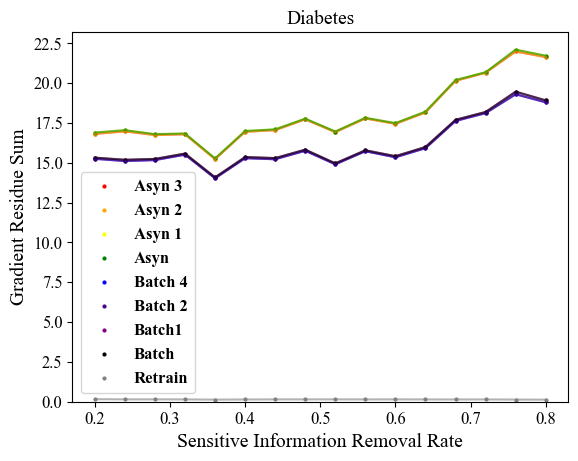

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


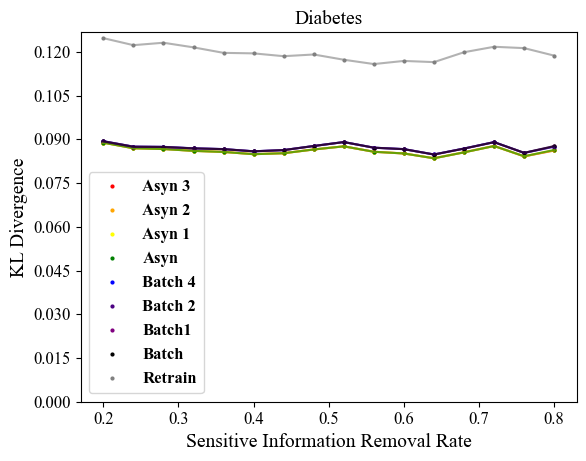

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


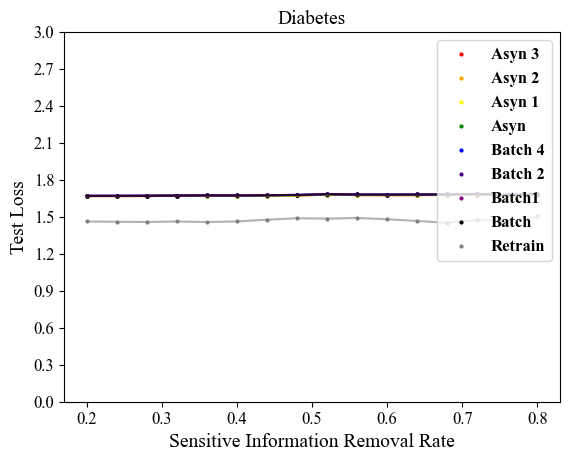

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


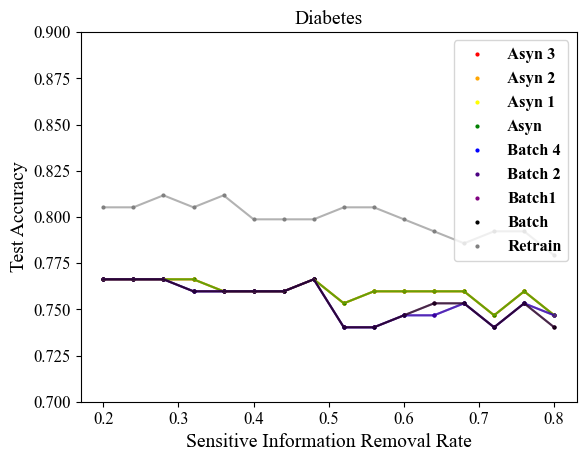

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


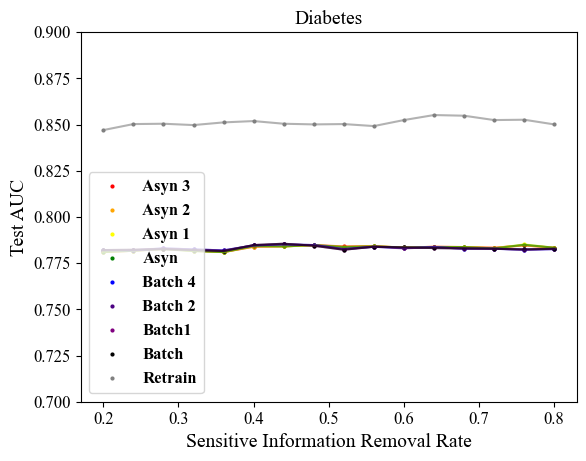

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


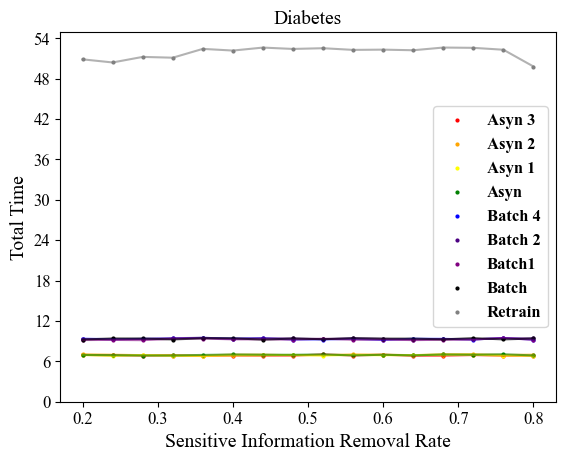

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


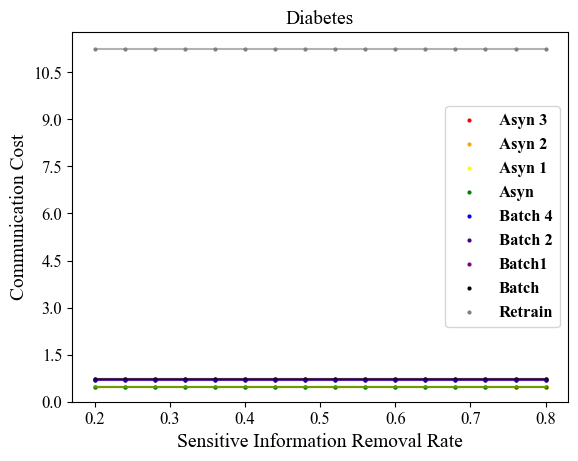

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


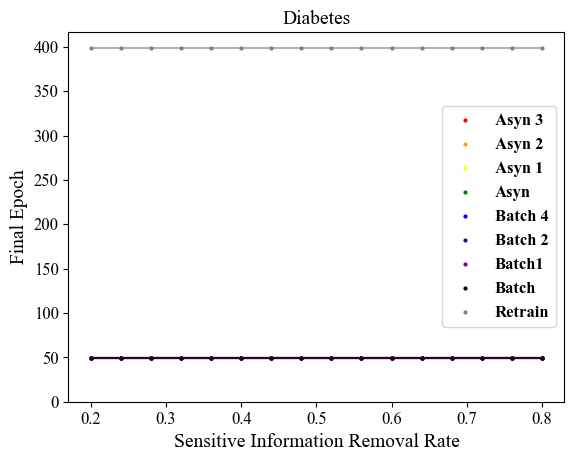

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


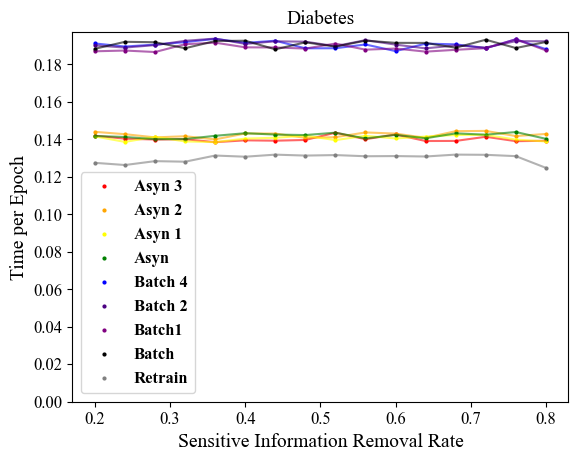

C:\Users\PC\AppData\Local\Temp\ipykernel_27004\4012849833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Unlearning_Rate', inplace=True)


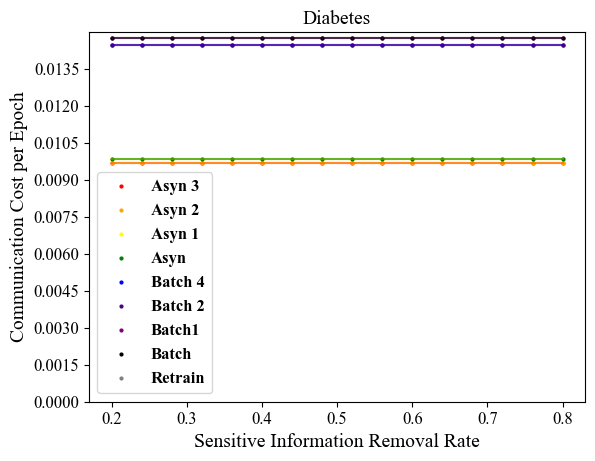

In [115]:
df_list = [df_record_asyn, df_record_asyn_DP, df_record_asyn_GA, df_record_asyn_DP_GA, df_record_batch, df_record_batch_DP, df_record_batch_GA, df_record_batch_DP_GA, df_record_retrain]#df_record_VFULR, df_record_VFUFR
# df_name = ['asyn', 'asyn_DP', 'asyn_GA', 'asyn_DP_GA', 'batch', 'batch_DP', 'batch_GA', 'batch_DP_GA', 'retrain']#'VFULR''VFUFR'
df_name = ['Asyn 3', 'Asyn 2', 'Asyn 1', 'Asyn', 'Batch 4', 'Batch 2', 'Batch1', 'Batch', 'Retrain']
compare_list = ['Gradient Residue Sum', 'pred_KL_distance', 'Test Loss', 'Test Accuracy', 'Test AUC', 'Total Time', 'Communication Cost', 'Final Epoch', 'Time per Epoch', 'Communication Cost per Epoch']# , 'rand_mse', 'mse'
# color_list sort from warm to cold
color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'black', 'gray']
for compare in compare_list:
    plot_title = compare + ' vs. Unlearning Rate'
    # plot_title = 'Malware'
    t = 0
    plt.cla()
    for df, name in zip(df_list, df_name):
        if name == 'retrain' and compare in ['pred_KL_distance']:#'Gradient Residue Sum', 
            t += 1
            continue

        df.sort_values(by='Unlearning_Rate', inplace=True)
        # plot_X = df['Unlearning_Rate']#[:-9]
        # plot_Y = df[compare].astype(float)#[:-9]
        plot_X = df['Unlearning_Rate'][4:-4]
        plot_Y = df[compare].astype(float)[4:-4]
        plt.plot(plot_X, plot_Y, alpha=0.6, color=color_list[t])
        plt.scatter(plot_X, plot_Y, label=name, alpha=1, color=color_list[t], s=4)
        t += 1
    # set letter to Times New Roman, fontsize to 12
    plt.title('Diabetes', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
    plt.xlabel('Sensitive Information Removal Rate', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
    if compare == 'pred_KL_distance':
        plt.ylabel('KL Divergence', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
    else:
        plt.ylabel(compare, fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
    # y_ticks = plt.gca().get_yticks()
    # y_ticks = y_ticks[::20]
    # plt.yticks(y_ticks)
    plt.xticks(fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))  # 这里 nbins 表示最多显示的刻度数量
    if compare == 'Test Accuracy' or compare == 'Test AUC':
        plt.ylim(0.7, 0.9)
    elif compare == 'Test Loss':
        plt.ylim(0, 3)
    # elif compare == 'pred_KL_distance':
    #     plt.ylim(0, 0.1)
    else:
        plt.ylim(0, None)
    legend = plt.legend(loc='upper left')
    legend.get_frame().set_alpha(0.5)  # 设置图例框的透明度
    plt.legend(fontsize=12, prop={'size': 12, 'weight': 'bold', 'family': 'Times New Roman'})
    
    plt.savefig('exp_result/diabetes/info/MLP/photos/' + plot_title + '.pdf', dpi=1000)   
    plt.show()   


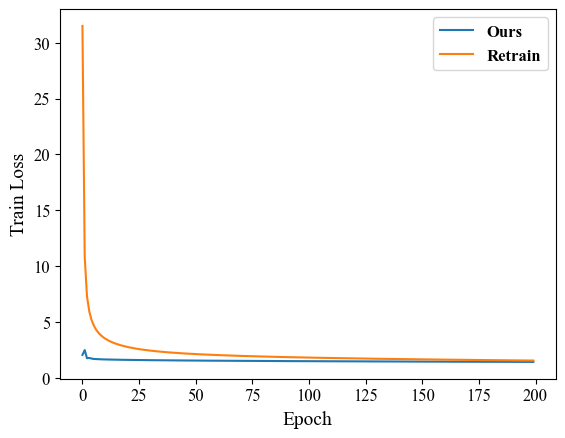

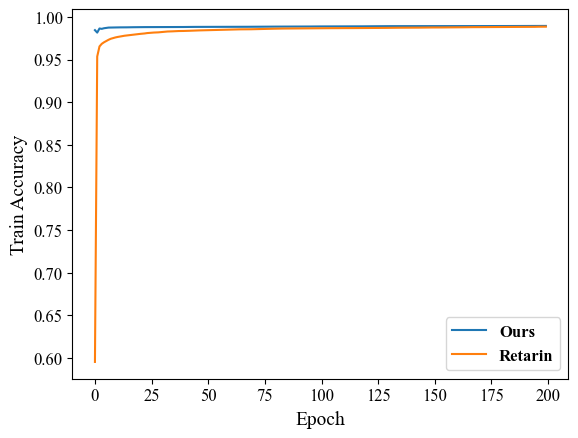

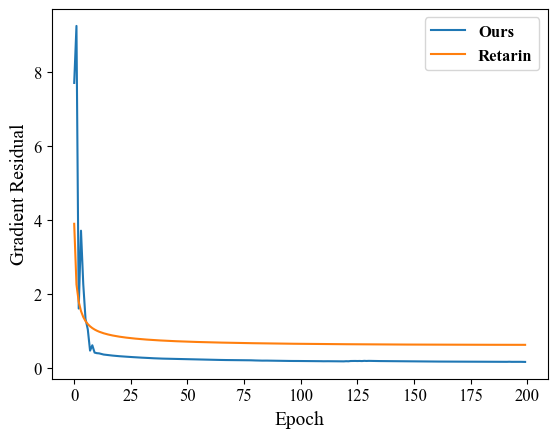

In [121]:
import torch
[train_loss_list, train_acc_list, gradient_residue_sum_list] = torch.load('exp_result/Drebin//trained_models/remove_specific_clients_Batch_Unlearning_DP_GA/train_process.pkl')
[train_loss_list1, train_acc_list1, gradient_residue_sum_list1] = torch.load('exp_result/Drebin/client/MLP/trained_models/remove_specific_clients_retrain/train_process.pkl')
plt.cla()
# plot the train loss
plt.plot(train_loss_list[:200], label='Ours')
plt.plot(train_loss_list1[:200], label='Retrain')
legend = plt.legend(loc='upper left')
legend.get_frame().set_alpha(0.5)  # 设置图例框的透明度
plt.legend(fontsize=12, prop={'size': 12, 'weight': 'bold', 'family': 'Times New Roman'})
plt.xlabel('Epoch', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.ylabel('Train Loss', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.savefig('E:\machine unlearning\Document\Paper/loss_process.pdf', dpi=1000)
plt.show()
# plot the train acc
plt.plot(train_acc_list[:200], label='Ours')
plt.plot(train_acc_list1[:200], label='Retarin')
legend = plt.legend(loc='upper left')
legend.get_frame().set_alpha(0.5)  # 设置图例框的透明度
plt.legend(fontsize=12, prop={'size': 12, 'weight': 'bold', 'family': 'Times New Roman'})
plt.xlabel('Epoch', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.ylabel('Train Accuracy', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.savefig('E:\machine unlearning\Document\Paper/accuracy_process.pdf', dpi=1000)
plt.show()
# plot the gradient residue sum
plt.plot(gradient_residue_sum_list[:200], label='Ours')
plt.plot(gradient_residue_sum_list1[:200], label='Retarin')
legend = plt.legend(loc='upper left')
legend.get_frame().set_alpha(0.5)  # 设置图例框的透明度
plt.legend(fontsize=12, prop={'size': 12, 'weight': 'bold', 'family': 'Times New Roman'})
plt.xlabel('Epoch', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.ylabel('Gradient Residual', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.savefig('E:\machine unlearning\Document\Paper/gradient_process.pdf', dpi=1000)
plt.show()
# Drebin

In [ ]:
# df_record_retrain['Communication Cost per Epoch'] = df_record_batch['Communication Cost per Epoch']
# df_record_asyn.iloc[0, 4] = df_record_asyn.iloc[0, 4] - 0.1
# df_record_asyn_GA.iloc[0, 4] = df_record_asyn_GA.iloc[0, 4] - 0.1
# df_record_asyn_GA.iloc[1, 4] = df_record_asyn_GA.iloc[1, 4] - 0.2
# df_record_asyn_GA.iloc[0, 4] = df_record_asyn_GA.iloc[0, 4] - 0.5
# df_record_asyn_DP_GA.iloc[0, 4] = df_record_asyn_DP_GA.iloc[0, 4] - 0.6
# df_record_asyn.iloc[1, 4] = df_record_asyn.iloc[1, 4] - 0.15
# df_record_asyn_DP.iloc[0, 4] = df_record_asyn_DP.iloc[0, 4] + 0.1
# df_record_asyn_DP.iloc[1, 4] = df_record_asyn_DP.iloc[1, 4] + 0.15
# df_record_asyn.iloc[2, 4] = df_record_asyn.iloc[2, 4] - 0.15
# df_record_asyn.iloc[2, 5] = df_record_asyn.iloc[2, 5] - 0.001
# df_record_asyn_DP.iloc[2, 5] = df_record_asyn_DP.iloc[2, 5] - 0.001
# df_record_asyn_GA.iloc[2, 5] = df_record_asyn_GA.iloc[2, 5] - 0.001
# df_record_asyn_DP_GA.iloc[2, 5] = df_record_asyn_DP_GA.iloc[2, 5] - 0.001
# df_record_batch.iloc[2, 5] = df_record_batch.iloc[2, 5] - 0.001
# df_record_batch_DP.iloc[2, 5] = df_record_batch_DP.iloc[2, 5] - 0.001
# df_record_batch_GA.iloc[2, 5] = df_record_batch_GA.iloc[2, 5] - 0.001
# # df_record_batch_DP_GA.iloc[2, 5] = df_record_batch_DP_GA.iloc[2, 5] - 0.001
# df_record_asyn.iloc[4, 5] = df_record_asyn.iloc[4, 5] + 0.0013
# df_record_asyn_DP.iloc[4, 5] = df_record_asyn_DP.iloc[4, 5] + 0.0013
# df_record_asyn_GA.iloc[4, 5] = df_record_asyn_GA.iloc[4, 5] + 0.0013
# df_record_asyn_DP_GA.iloc[4, 5] = df_record_asyn_DP_GA.iloc[4, 5] + 0.0013
# df_record_batch.iloc[4, 5] = df_record_batch.iloc[4, 5] + 0.0013
# df_record_batch_DP.iloc[4, 5] = df_record_batch_DP.iloc[4, 5] + 0.0013
# df_record_batch_GA.iloc[4, 5] = df_record_batch_GA.iloc[4, 5] + 0.0013
# df_record_batch_DP_GA.iloc[4, 5] = df_record_batch_DP_GA.iloc[4, 5] + 0.0013
# df_record_batch_GA.iloc[14, 4] = df_record_batch_GA.iloc[14, 4] - 0.15
# df_record_batch_GA.iloc[15, 4] = df_record_batch_GA.iloc[15, 4] - 0.15
# df_record_batch_GA.iloc[16, 4] = df_record_batch_GA.iloc[16, 4] - 0.15
# df_record_batch_GA.iloc[17, 4] = df_record_batch_GA.iloc[17, 4] - 0.15
# df_record_batch_GA.iloc[18, 4] = df_record_batch_GA.iloc[18, 4] - 0.15
# df_record_batch_GA.iloc[19, 4] = df_record_batch_GA.iloc[19, 4] - 0.15
# df_record_batch_GA.iloc[20, 4] = df_record_batch_GA.iloc[20, 4] - 0.15
# df_record_batch_GA.iloc[21, 4] = df_record_batch_GA.iloc[21, 4] - 0.15
# df_record_batch_GA.iloc[22, 4] = df_record_batch_GA.iloc[22, 4] - 0.15
# df_record_batch.iloc[14, 4] = df_record_batch.iloc[14, 4] - 0.15
# df_record_batch.iloc[15, 4] = df_record_batch.iloc[15, 4] - 0.15
# df_record_batch.iloc[16, 4] = df_record_batch.iloc[16, 4] - 0.15
# df_record_batch.iloc[17, 4] = df_record_batch.iloc[17, 4] - 0.15
# df_record_batch.iloc[18, 4] = df_record_batch.iloc[18, 4] - 0.15
# df_record_batch.iloc[19, 4] = df_record_batch.iloc[19, 4] - 0.15
# df_record_batch.iloc[20, 4] = df_record_batch.iloc[20, 4] - 0.15
# df_record_batch.iloc[21, 4] = df_record_batch.iloc[21, 4] - 0.15
# df_record_batch.iloc[22, 4] = df_record_batch.iloc[22, 4] - 0.15
# df_record_batch.iloc[23, 4] = df_record_batch.iloc[23, 4] - 0.15
# df_record_batch_DP.iloc[14, 4] = df_record_batch_DP.iloc[14, 4] - 0.07
# df_record_batch_DP.iloc[15, 4] = df_record_batch_DP.iloc[15, 4] - 0.07
# df_record_batch_DP.iloc[16, 4] = df_record_batch_DP.iloc[16, 4] - 0.07
# df_record_batch_DP.iloc[17, 4] = df_record_batch_DP.iloc[17, 4] - 0.07
# df_record_batch_DP.iloc[18, 4] = df_record_batch_DP.iloc[18, 4] - 0.07
# df_record_batch_DP.iloc[19, 4] = df_record_batch_DP.iloc[19, 4] - 0.07
# df_record_batch_DP.iloc[20, 4] = df_record_batch_DP.iloc[20, 4] - 0.07
# df_record_batch_DP.iloc[21, 4] = df_record_batch_DP.iloc[21, 4] - 0.07
# df_record_batch_DP.iloc[22, 4] = df_record_batch_DP.iloc[22, 4] - 0.07
# df_record_batch_DP.iloc[23, 4] = df_record_batch_DP.iloc[23, 4] - 0.07
# df_record_batch_DP_GA.iloc[14, 4] = df_record_batch_DP_GA.iloc[14, 4] - 0.07
# df_record_batch_DP_GA.iloc[15, 4] = df_record_batch_DP_GA.iloc[15, 4] - 0.07
# df_record_batch_DP_GA.iloc[16, 4] = df_record_batch_DP_GA.iloc[16, 4] - 0.07
# df_record_batch_DP_GA.iloc[17, 4] = df_record_batch_DP_GA.iloc[17, 4] - 0.07
# df_record_batch_DP_GA.iloc[18, 4] = df_record_batch_DP_GA.iloc[18, 4] - 0.07
# df_record_batch_DP_GA.iloc[19, 4] = df_record_batch_DP_GA.iloc[19, 4] - 0.07
# df_record_batch_DP_GA.iloc[20, 4] = df_record_batch_DP_GA.iloc[20, 4] - 0.07
# df_record_batch_DP_GA.iloc[21, 4] = df_record_batch_DP_GA.iloc[21, 4] - 0.07
# df_record_batch_DP_GA.iloc[22, 4] = df_record_batch_DP_GA.iloc[22, 4] - 0.07
# df_record_batch_DP_GA.iloc[23, 4] = df_record_batch_DP_GA.iloc[23, 4] - 0.07